<a href="https://colab.research.google.com/github/G4br13L-J/AnalisisDatos2023/blob/main/Lab4Clusters.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Integrantes: Anthony Li Perera, Gabriel Jiménez Navarro, Gabriel Chavarría Calero, Didier Miranda Delgado.

Video base: https://www.youtube.com/watch?v=s6PSSzeUMFk&t=460s&ab_channel=RocioChavezCienciadeDatos



In [ ]:
import numpy as np #Se usa Numpy para cálculos científicos
import pandas as pd #Se emplea Pandas para el análisis de datos
import matplotlib.pyplot as plt #Se utiliza Matplotlib para la creación de gráficos
from sklearn.cluster import KMeans #Se importa la función KMeans para poder llevar a cabo el clustering con este método

In [ ]:
#Se importan los datos desde el CSV elegido
stats=pd.read_csv('/content/2023_nba_player_stats.csv')

In [ ]:
#Vemos las caracteristicas del objeto stats
stats.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 539 entries, 0 to 538
Data columns (total 30 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Nombre                                 539 non-null    object 
 1   Posicion                               534 non-null    object 
 2   Equipo                                 539 non-null    object 
 3   Edad                                   539 non-null    int64  
 4   Partidos_jugados                       539 non-null    int64  
 5   Partidos_ganados                       539 non-null    int64  
 6   Partidos_perdidos                      539 non-null    int64  
 7   Minutos_jugados                        539 non-null    float64
 8   Puntos_marcados                        539 non-null    int64  
 9   Tiros_de_campo_marcados                539 non-null    int64  
 10  Tiros_de_campo_intentados              539 non-null    int64  
 11  Porcen

In [ ]:
#Desplegamos las primeras filas
stats.head()

,Nombre,Posicion,Equipo,Edad,Partidos_jugados,Partidos_ganados,Partidos_perdidos,Minutos_jugados,Puntos_marcados,Tiros_de_campo_marcados,...,Total_de_rebotes,Asistencias,Perdidas_del_jugador,Robos_exitosos,Bloqueos_exitosos,Faltas_cometidas,Puntos_Fantasy,Dobles_dobles_exitosos,Triples_dobles_exitosos,Impacto
0,Jayson Tatum,Alero,BOS,25,74,52,22,2732.2,2225,727,...,649,342,213,78,51,160,3691,31,1,470
1,Joel Embiid,Pivot,PHI,29,66,43,23,2284.1,2183,728,...,670,274,226,66,112,205,3706,39,1,424
2,Luka Doncic,Base,DAL,24,66,33,33,2390.5,2138,719,...,569,529,236,90,33,166,3747,36,10,128
3,Shai Gilgeous-Alexander,Base,OKC,24,68,33,35,2416.0,2135,704,...,329,371,192,112,65,192,3425,3,0,149
4,Giannis Antetokounmpo,Ala-Pivot,MIL,28,63,47,16,2023.6,1959,707,...,742,359,246,52,51,197,3451,46,6,341


In [ ]:
#Nos deshacemos de las primeras tres columnas ya que unicamente vamos a trabajar con valores numericos
stats_variables=stats.drop(columns=['Nombre', 'Posicion','Equipo'])

In [ ]:
#Obtenemos los estadísticos descriptivos de stats(Mínimo, Máximo, Promedio, desviación estándar y los cuartiles de cada columna)
stats_variables.describe()

,Edad,Partidos_jugados,Partidos_ganados,Partidos_perdidos,Minutos_jugados,Puntos_marcados,Tiros_de_campo_marcados,Tiros_de_campo_intentados,Porcentaje_de_tiros_de_campo_exitosos,Triples_marcados,...,Total_de_rebotes,Asistencias,Perdidas_del_jugador,Robos_exitosos,Bloqueos_exitosos,Faltas_cometidas,Puntos_Fantasy,Dobles_dobles_exitosos,Triples_dobles_exitosos,Impacto
count,539.000000,539.000000,539.000000,539.000000,539.000000,539.000000,539.000000,539.000000,539.000000,539.000000,...,539.000000,539.000000,539.000000,539.000000,539.000000,539.000000,539.000000,539.000000,539.000000,539.000000
mean,25.970315,48.040816,24.018553,24.022263,1103.617625,523.426716,191.576994,403.005566,46.325232,56.324675,...,198.254174,115.545455,61.300557,33.270872,21.241187,91.181818,1036.938776,4.011132,0.220779,0.000000
std,4.315513,24.650686,14.496366,13.445866,827.765114,498.084360,178.351286,369.595909,10.967271,60.916821,...,181.819962,129.578453,58.279185,28.336745,26.529238,66.206731,894.081896,8.770932,1.564432,148.223909
min,19.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,0.000000,-642.000000
25%,23.000000,30.500000,12.000000,14.000000,329.000000,120.500000,45.500000,93.500000,41.650000,5.000000,...,50.500000,22.000000,14.500000,8.500000,5.000000,32.000000,254.000000,0.000000,0.000000,-70.000000
50%,25.000000,54.000000,25.000000,25.000000,970.200000,374.000000,138.000000,300.000000,45.500000,36.000000,...,159.000000,69.000000,44.000000,28.000000,13.000000,86.000000,810.000000,0.000000,0.000000,-7.000000
75%,29.000000,68.000000,36.000000,34.000000,1845.900000,769.500000,283.500000,598.500000,50.600000,92.000000,...,286.000000,162.500000,92.500000,51.000000,28.000000,140.000000,1646.000000,3.000000,0.000000,57.000000
max,42.000000,83.000000,57.000000,60.000000,2963.200000,2225.000000,728.000000,1559.000000,100.000000,301.000000,...,973.000000,741.000000,300.000000,128.000000,193.000000,279.000000,3842.000000,65.000000,29.000000,640.000000


In [ ]:
#Normalizamos los valores para tenerlos dentro de un mismo rango(0-1)
stats_norm=(stats_variables-stats_variables.min())/(stats_variables.max()-stats_variables.min())
stats_norm.describe()

,Edad,Partidos_jugados,Partidos_ganados,Partidos_perdidos,Minutos_jugados,Puntos_marcados,Tiros_de_campo_marcados,Tiros_de_campo_intentados,Porcentaje_de_tiros_de_campo_exitosos,Triples_marcados,...,Total_de_rebotes,Asistencias,Perdidas_del_jugador,Robos_exitosos,Bloqueos_exitosos,Faltas_cometidas,Puntos_Fantasy,Dobles_dobles_exitosos,Triples_dobles_exitosos,Impacto
count,539.000000,539.000000,539.000000,539.000000,539.000000,539.000000,539.000000,539.000000,539.000000,539.000000,...,539.000000,539.000000,539.000000,539.000000,539.000000,539.000000,539.000000,539.000000,539.000000,539.000000
mean,0.303057,0.573668,0.421378,0.400371,0.372229,0.235248,0.263155,0.258503,0.463252,0.187125,...,0.203756,0.155932,0.204335,0.259929,0.110058,0.326817,0.270086,0.061710,0.007613,0.500780
std,0.187631,0.300618,0.254322,0.224098,0.279443,0.223858,0.244988,0.237072,0.109673,0.202381,...,0.186865,0.174870,0.194264,0.221381,0.137457,0.237300,0.232652,0.134937,0.053946,0.115619
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.173913,0.359756,0.210526,0.233333,0.110729,0.054157,0.062500,0.059974,0.416500,0.016611,...,0.051901,0.029690,0.048333,0.066406,0.025907,0.114695,0.066354,0.000000,0.000000,0.446178
50%,0.260870,0.646341,0.438596,0.416667,0.327189,0.168090,0.189560,0.192431,0.455000,0.119601,...,0.163412,0.093117,0.146667,0.218750,0.067358,0.308244,0.211033,0.000000,0.000000,0.495320
75%,0.434783,0.817073,0.631579,0.566667,0.622814,0.345843,0.389423,0.383900,0.506000,0.305648,...,0.293936,0.219298,0.308333,0.398438,0.145078,0.501792,0.428571,0.046154,0.000000,0.545242
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


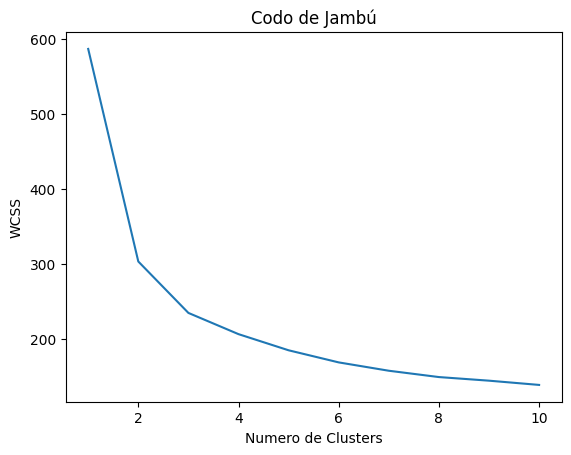

In [ ]:
#Se utiliza el metodo del codo de Jambú para buscar la cantidad óptima de clusters
wcss=[] #Lista vacia que almacena los valores de WCSS que se van calculando

for i in range(1,11):
  kmeans = KMeans(n_clusters = i, n_init=10 , max_iter = 300)
  kmeans.fit(stats_norm) #Se aplica K-means a la base de datos normalizada
  wcss.append(kmeans.inertia_)

#Se grafican los resultados de WCSS para formar el codo de Jambú
plt.plot(range(1,11),wcss)
plt.title("Codo de Jambú")
plt.xlabel('Numero de Clusters')
plt.ylabel('WCSS') #WCSS. Se utiliza como un indicador de que tan similares son los individuos dentro de los clusters
plt.show()

In [ ]:
#Se aplica el metodo K-Means a la base de datos
clustering = KMeans(n_clusters = 3, n_init=10 , max_iter = 300)#Crea el modelo
clustering.fit(stats_norm) # Aplica ese modelo a la base de datos

KMeans(n_clusters=3, n_init=10)

In [ ]:
#Se agrega la clasificación al archivo original
stats['KMeans_Clusters'] = clustering.labels_
stats.head()

,Nombre,Posicion,Equipo,Edad,Partidos_jugados,Partidos_ganados,Partidos_perdidos,Minutos_jugados,Puntos_marcados,Tiros_de_campo_marcados,...,Asistencias,Perdidas_del_jugador,Robos_exitosos,Bloqueos_exitosos,Faltas_cometidas,Puntos_Fantasy,Dobles_dobles_exitosos,Triples_dobles_exitosos,Impacto,KMeans_Clusters
0,Jayson Tatum,Alero,BOS,25,74,52,22,2732.2,2225,727,...,342,213,78,51,160,3691,31,1,470,2
1,Joel Embiid,Pivot,PHI,29,66,43,23,2284.1,2183,728,...,274,226,66,112,205,3706,39,1,424,2
2,Luka Doncic,Base,DAL,24,66,33,33,2390.5,2138,719,...,529,236,90,33,166,3747,36,10,128,2
3,Shai Gilgeous-Alexander,Base,OKC,24,68,33,35,2416.0,2135,704,...,371,192,112,65,192,3425,3,0,149,2
4,Giannis Antetokounmpo,Ala-Pivot,MIL,28,63,47,16,2023.6,1959,707,...,359,246,52,51,197,3451,46,6,341,2


In [ ]:
#Visualización de los clusters que se formaron
from sklearn.decomposition import PCA

pca= PCA(n_components=2)
pca_stats = pca.fit_transform(stats_norm)
pca_stats_df = pd.DataFrame(data = pca_stats, columns = ['Estadistica_1','Estadistica_2'])
pca_stats_simplificadas = pd.concat([pca_stats_df,stats[['KMeans_Clusters']]],axis=1)

pca_stats_simplificadas

,Estadistica_1,Estadistica_2,KMeans_Clusters
0,2.206643,-0.481972,2
1,1.951269,0.190076,2
2,2.031081,-0.418219,2
3,1.744617,-0.215023,2
4,1.788402,0.302932,2
...,...,...,...
534,-1.277233,-0.003826,1
535,-1.265266,-0.024789,1
536,-1.277301,-0.006139,1
537,-1.283535,0.006874,1


<function matplotlib.pyplot.show(close=None, block=None)>

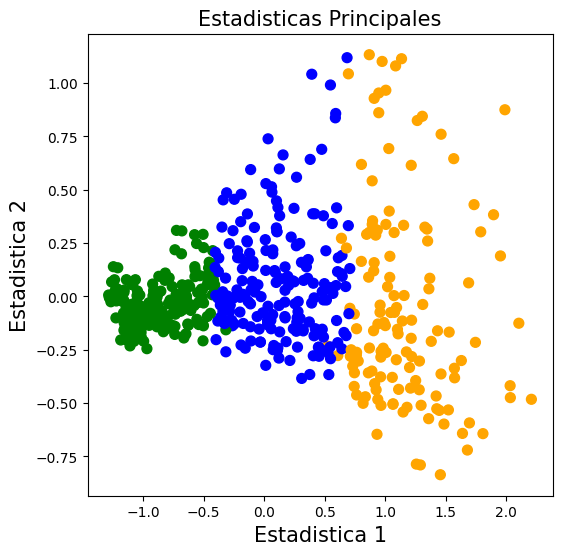

In [ ]:
fig = plt.figure(figsize =(6,6))

ax= fig.add_subplot(1,1,1)
ax.set_xlabel('Estadistica 1',fontsize = 15)
ax.set_ylabel('Estadistica 2',fontsize = 15)
ax.set_title('Estadisticas Principales',fontsize = 15)

color_theme = np.array(["blue","green","orange"])
ax.scatter(x = pca_stats_simplificadas.Estadistica_1,y = pca_stats_simplificadas.Estadistica_2,
           c=color_theme[pca_stats_simplificadas.KMeans_Clusters],s=50)
plt.show